In [1]:
import numpy as np
import math
from scipy.special import factorial
import matplotlib.pyplot as plt
from scipy.special import eval_genlaguerre

### Definitions

In [2]:
def displacement_operator(n, m, beta):
    exp_term = np.exp(-beta)
    if m <= n:
        lag_term = eval_genlaguerre(m, n-m, beta)
        coefficient = factorial(m) / factorial(n)
        add_term = beta ** (n-m)
    else:
        lag_term = eval_genlaguerre(n, m-n, beta)
        coefficient = factorial(n) / factorial(m)
        add_term = beta ** (m-n)
    return coefficient * add_term * exp_term * (lag_term ** 2)

def derivative_displacement_operator(n, m, beta, epsilon=1e-6):
    plus = displacement_operator(n, m, beta + epsilon)
    minus = displacement_operator(n, m, beta - epsilon)
    derivative = (plus - minus) / (2 * epsilon)
    return derivative

def calculate_F(rho, beta, max_n=50, epsilon=1e-6):
    F = 0.0
    for n in range(max_n):
        for m in range(max_n):
            delta_nm = displacement_operator(n, m, beta)
            d_delta_nm = derivative_displacement_operator(n, m, beta, epsilon)
            if m < len(rho) and delta_nm != 0:  
                F += (rho[m] / (delta_nm)) * (d_delta_nm) ** 2
    return F

def calculate_F_with_uncertainty(rho, rho_uncertainties, beta, max_n=50, epsilon=1e-6):
    F_upper = calculate_F([rho[i] + rho_uncertainties[i] for i in range(len(rho))], beta, max_n, epsilon)
    F_lower = calculate_F([rho[i] - rho_uncertainties[i] for i in range(len(rho))], beta, max_n, epsilon)
    return F_upper, F_lower

def plot_rho_and_uncertainty(rho, rho0, rho_uncertainties, beta_values, theory_value, label, color, exp=True):
    F_values = [calculate_F(rho, beta) for beta in beta_values]
    F0_values = [calculate_F(rho0, beta) for beta in beta_values]
    R = [np.sqrt(f0/f) for f, f0 in zip(F_values, F0_values)]

    R_upper = []
    R_lower = []

    for beta in beta_values:
        F_upper, F_lower = calculate_F_with_uncertainty(rho, rho_uncertainties, beta)
        F0 = calculate_F(rho0, beta)
        R_upper.append(np.sqrt(F0 / F_lower))
        R_lower.append(np.sqrt(F0 / F_upper))

    if exp == True:
        plt.plot(beta_values, R, label=f'Experiment {label}', color=color)
        plt.fill_between(beta_values, R_lower, R_upper, color=color, alpha=0.3)
    plt.plot(beta_values, [1/np.sqrt(theory_value)]*len(beta_values), '--', label=f'Theory {label}', color=color)

### Plot R

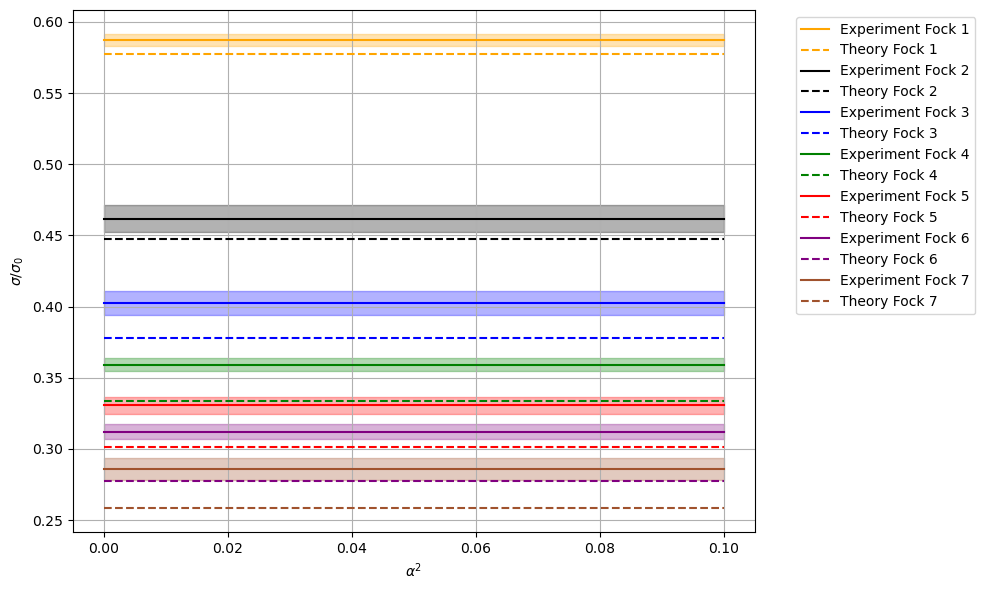

In [3]:
beta_values = np.linspace(0.00001, 0.1, 100)

plt.figure(figsize=(10, 6))

# Fock 1
rho = [0.0608040564, 0.9293535838, 0.0098423598]
rho0 = [1, 0, 0]
rho_uncertainties = [0.0087597800, 0.0061570871, 0.0029739268]
plot_rho_and_uncertainty(rho, rho0, rho_uncertainties, beta_values, 3, 'Fock 1', 'orange')

# Fock 2
rho = [0.050, 0.054, 0.893, 0.003]
rho0 = [1, 0, 0, 0]
rho_uncertainties = [0.001, 0.003, 0.017, 0.014]
plot_rho_and_uncertainty(rho, rho0, rho_uncertainties, beta_values, 5, 'Fock 2', 'black')

# Fock 3
rho = [0.071, 0.048, 0.102, 0.779, 0.0]
rho0 = [1, 0, 0, 0, 0]
rho_uncertainties = [0.001, 0.003, 0.018, 0.016, 0.005]
plot_rho_and_uncertainty(rho, rho0, rho_uncertainties, beta_values, 7, 'Fock 3', 'blue')

# Fock 4
rho = [0.083, 0.035, 0.045, 0.108, 0.718, 0.011]
rho0 = [1, 0, 0, 0, 0, 0]
rho_uncertainties = [0.002, 0.001, 0.002, 0.013, 0.005, 0.005]
plot_rho_and_uncertainty(rho, rho0, rho_uncertainties, beta_values, 9, 'Fock 4', 'green')

# Fock 5
rho = [0.084, 0.037, 0.043, 0.047, 0.141, 0.632, 0.015]
rho0 = [1, 0, 0, 0, 0, 0, 0]
rho_uncertainties = [0.001, 0.004, 0.004, 0.010, 0.009, 0.006, 0.006]
plot_rho_and_uncertainty(rho, rho0, rho_uncertainties, beta_values, 11, 'Fock 5', 'red')

# Fock 6
rho = [0.077, 0.072, 0.055, 0.032, 0.043, 0.143, 0.572, 0.005]
rho0 = [1, 0, 0, 0, 0, 0, 0, 0]
rho_uncertainties = [0.003, 0.004, 0.001, 0.002, 0.008, 0.005, 0.005, 0.009]
plot_rho_and_uncertainty(rho, rho0, rho_uncertainties, beta_values, 13, 'Fock 6', 'purple')

# Fock 7
rho = [0.086, 0.033, 0.020, 0.035, 0.042, 0.049, 0.168, 0.502, 0.065]
rho0 = [1, 0, 0, 0, 0, 0, 0, 0, 0]
rho_uncertainties = [0.003, 0.003, 0.001, 0.002, 0.007, 0.002, 0.014, 0.006, 0.016]
plot_rho_and_uncertainty(rho, rho0, rho_uncertainties, beta_values, 15, 'Fock 7', 'sienna')

plt.xlabel('$\\alpha^2$')
plt.ylabel('$\\sigma/\\sigma_{0}$')
plt.title('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
#plt.ylim(0, 1)
plt.tight_layout()
plt.show()

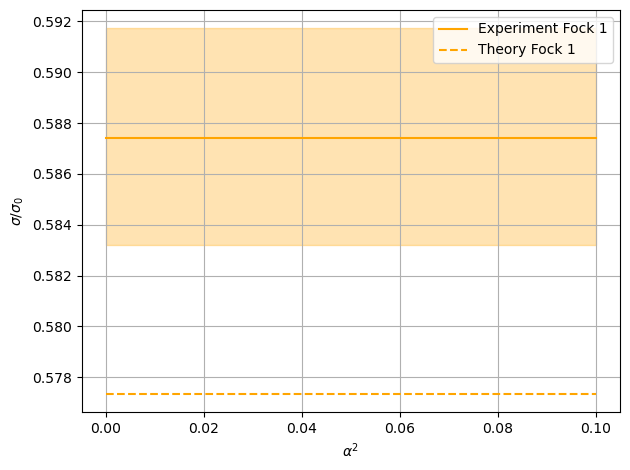

In [4]:
# Fock 1
rho = [0.0608040564, 0.9293535838, 0.0098423598]
rho0 = [1, 0, 0,]
rho_uncertainties = [0.0087597800, 0.0061570871, 0.0029739268]
plot_rho_and_uncertainty(rho, rho0, rho_uncertainties, beta_values, 3, 'Fock 1', 'orange')

plt.xlabel('$\\alpha^2$')
plt.ylabel('$\\sigma/\\sigma_{0}$')
plt.title('')
plt.legend()
plt.grid(True)
#plt.ylim(0, 1)
plt.tight_layout()
plt.show()

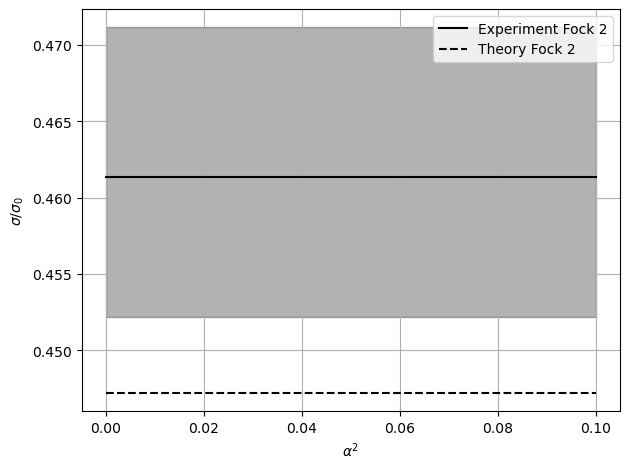

In [5]:
# Fock 2
rho = [0.050, 0.054, 0.893, 0.003]
rho0 = [1, 0, 0, 0]
rho_uncertainties = [0.001, 0.003, 0.017, 0.014]
plot_rho_and_uncertainty(rho, rho0, rho_uncertainties, beta_values, 5, 'Fock 2', 'black')

plt.xlabel('$\\alpha^2$')
plt.ylabel('$\\sigma/\\sigma_{0}$')
plt.title('')
plt.legend()
plt.grid(True)
#plt.ylim(0, 1)
plt.tight_layout()
plt.show()

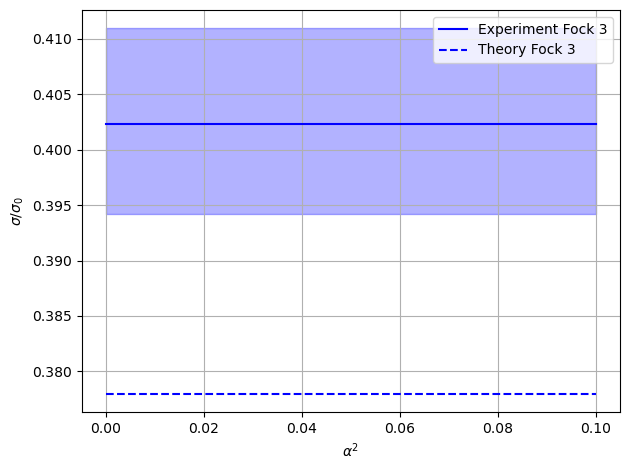

In [6]:
# Fock 3
rho = [0.071, 0.048, 0.102, 0.779, 0.0]
rho0 = [1, 0, 0, 0, 0]
rho_uncertainties = [0.001, 0.003, 0.018, 0.016, 0.005]
plot_rho_and_uncertainty(rho, rho0, rho_uncertainties, beta_values, 7, 'Fock 3', 'blue')

plt.xlabel('$\\alpha^2$')
plt.ylabel('$\\sigma/\\sigma_{0}$')
plt.title('')
plt.legend()
plt.grid(True)
#plt.ylim(0, 1)
plt.tight_layout()
plt.show()

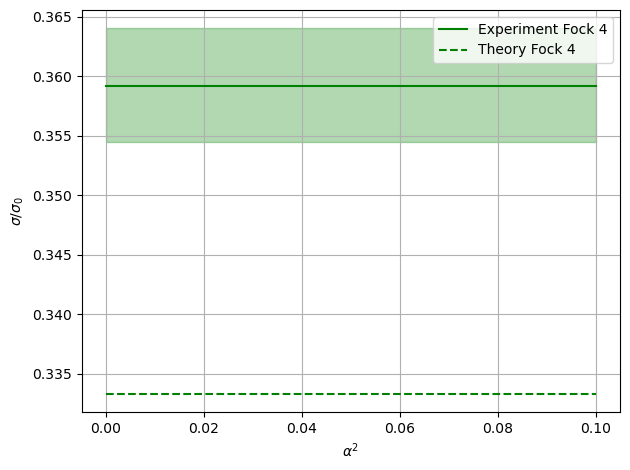

In [7]:
# Fock 4
rho = [0.083, 0.035, 0.045, 0.108, 0.718, 0.011]
rho0 = [1, 0, 0, 0, 0, 0]
rho_uncertainties = [0.002, 0.001, 0.002, 0.013, 0.005, 0.005]
plot_rho_and_uncertainty(rho, rho0, rho_uncertainties, beta_values, 9, 'Fock 4', 'green')

plt.xlabel('$\\alpha^2$')
plt.ylabel('$\\sigma/\\sigma_{0}$')
plt.title('')
plt.legend()
plt.grid(True)
#plt.ylim(0, 1)
plt.tight_layout()
plt.show()

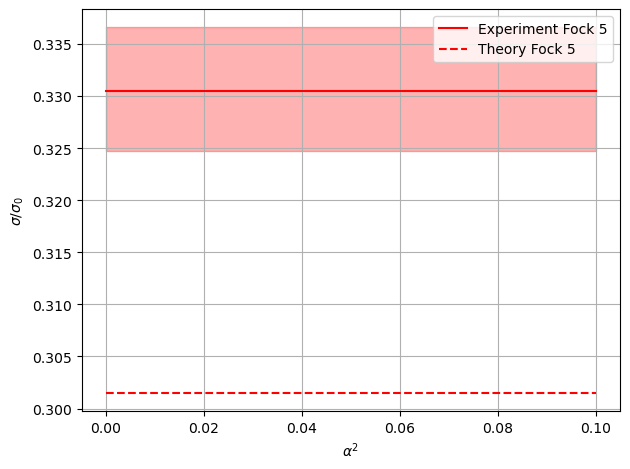

In [8]:
# Fock 5
rho = [0.084, 0.037, 0.043, 0.047, 0.141, 0.632, 0.015]
rho0 = [1, 0, 0, 0, 0, 0, 0]
rho_uncertainties = [0.001, 0.004, 0.004, 0.010, 0.009, 0.006, 0.006]
plot_rho_and_uncertainty(rho, rho0, rho_uncertainties, beta_values, 11, 'Fock 5', 'red')

plt.xlabel('$\\alpha^2$')
plt.ylabel('$\\sigma/\\sigma_{0}$')
plt.title('')
plt.legend()
plt.grid(True)
#plt.ylim(0, 1)
plt.tight_layout()
plt.show()

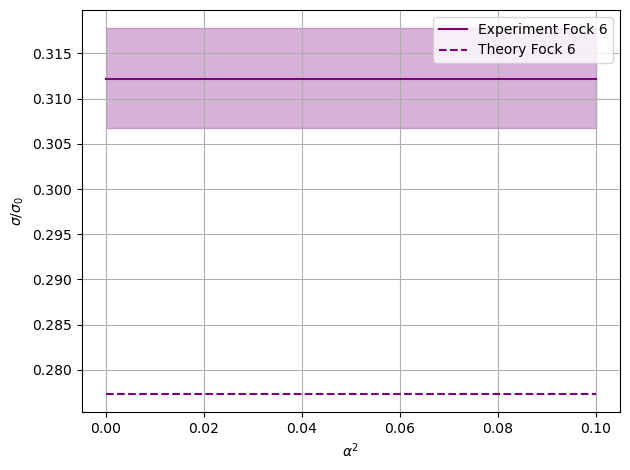

In [9]:
# Fock 6
rho = [0.077, 0.072, 0.055, 0.032, 0.043, 0.143, 0.572, 0.005]
rho0 = [1, 0, 0, 0, 0, 0, 0, 0]
rho_uncertainties = [0.003, 0.004, 0.001, 0.002, 0.008, 0.005, 0.005, 0.009]
plot_rho_and_uncertainty(rho, rho0, rho_uncertainties, beta_values, 13, 'Fock 6', 'purple')

plt.xlabel('$\\alpha^2$')
plt.ylabel('$\\sigma/\\sigma_{0}$')
plt.title('')
plt.legend()
plt.grid(True)
#plt.ylim(0, 1)
plt.tight_layout()
plt.show()

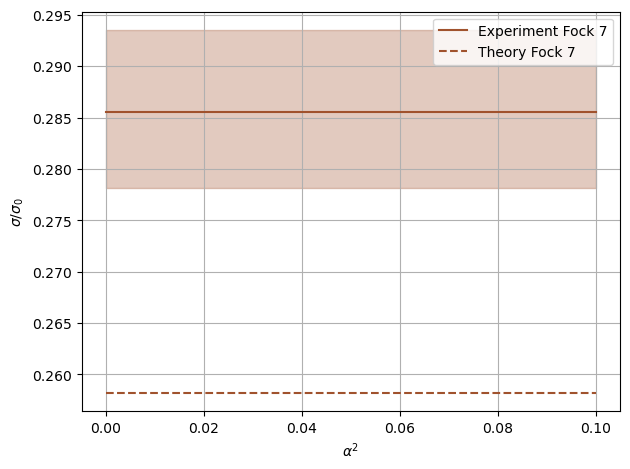

In [10]:
# Fock 7
rho = [0.086, 0.033, 0.020, 0.035, 0.042, 0.049, 0.168, 0.502, 0.065]
rho0 = [1, 0, 0, 0, 0, 0, 0, 0, 0]
rho_uncertainties = [0.003, 0.003, 0.001, 0.002, 0.007, 0.002, 0.014, 0.006, 0.016]
plot_rho_and_uncertainty(rho, rho0, rho_uncertainties, beta_values, 15, 'Fock 7', 'sienna')

plt.xlabel('$\\alpha^2$')
plt.ylabel('$\\sigma/\\sigma_{0}$')
plt.title('')
plt.legend()
plt.grid(True)
#plt.ylim(0, 1)
plt.tight_layout()
plt.show()